# Matching astrometrical catalogs

## A tool for cross correlation or matching two catalogs

In [36]:
"""import libraries"""

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import glob

We define the path to de directory that holds the files. We also need to specify, which columns will be use for correlate.
The threshold $th$ will help us determine the proximity between any two stars of each catalog according to their coordinates ($\alpha$, $\delta$).

In [72]:
"""define tables path and names"""

dirpath = './files/'

files = glob.glob(dirpath + '*.csv')
print(files)


"""columns use for matching"""

c2m = ['RAJ2000','DEJ2000']


"""Threshold"""

th = 3./3600.

['./files/datos.II348.csv', './files/datos.II246.csv']


In [73]:
"""Reading and sorting tables"""

df = [pd.read_csv(f) for f in files]


"""Sorting"""

df.sort(key=len, reverse=False)

coords1, coords2 = df[0][c2m], df[1][c2m]
coords1.columns = coords2.columns = ['x', 'y']

coords1 = coords1.sort_values(by=['y'])
coords2 = coords2.sort_values(by=['y'])
len(coords2)

25749

### Selecition criteria:
$$d = \sqrt{\left[ (\alpha_{iA} - \alpha_{jB})\cdot\cos(\delta_{jB}) \right] ^2 + (\delta_{iA} - \delta_{jB})^2}$$ 

Where $\alpha_{iA,jB}$ and $\delta_{iA,jB}$ represent right ascension and declination coordinates of $i,~j$ stars, of catalogs $A,~B$, respectively.


In [74]:
def dst(t1,t2):
    return np.sqrt(((t1.x - t2.x)*np.cos(np.pi*t2.y/180.0))**2 + (t1.y-t2.y)**2)

In [75]:
%%time

"""construct the distance matrix"""

dst_m = coords1.apply(dst, t2=coords2, axis=1)

CPU times: user 16.2 s, sys: 1.5 s, total: 17.7 s
Wall time: 8.72 s


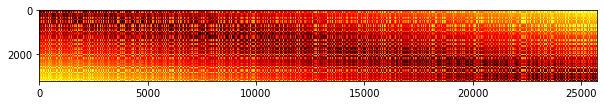

In [76]:
"""matrix plot"""

fig = plt.figure(figsize=(10,10))
plt.imshow(dst_m, cmap='hot', interpolation='None')

In [77]:
%%time
"""threshold cut"""

dst_nm = dst_m.values

md_m = dst_m[(dst_m < th)]

CPU times: user 401 ms, sys: 303 ms, total: 703 ms
Wall time: 396 ms


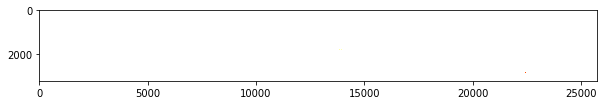

In [78]:
fig = plt.figure(figsize=(10,10))
plt.imshow(md_m, cmap='hot', aspect='equal', interpolation='None')
fig.savefig("dtsm-imshow2.png", dpi=100)

In [79]:
ra1, de1 = df[0][c2m[0]],df[0][c2m[1]]
ra2, de2 = df[1][c2m[0]],df[1][c2m[1]] 

In [107]:
%%time

cl1 = ['nmA']*len(ra1)
cl2 = ['nmB']*len(ra2)
k =  int()
for i, ra, de in zip(range(len(ra1)),ra1,de1):
    d = np.sqrt(((ra-ra2)*np.cos(de*np.pi/180.))**2.+(de-de2)**2.)
    if(len(np.where(d < th)[0]) > 0):
        print(np.argwhere((d < th))[0][0])
        #k = np.argwhere((d < th) & (d == d.min()))[0][0]
#        dk = np.sqrt(((ra1-ra2[k])*np.cos(de2[k]*np.pi/180.))**2.+(de1-de2[k])**2.)
#        el = np.argwhere((dk<th) & (dk == dk.min()))[0][0]
#        cl1[el] = i
#        cl2[k]  = i

df[0]['idMA'] = cl1
df[1]['idMB'] = cl2

ValueError: Length of passed values is 1, index implies 25749.

In [13]:
pdm = pd.merge(df[0],df[1], how = 'outer', left_on=['idMA'], right_on=['idMB'])

pdm[c2m[0]] = pdm[[c2m[0]+'_x',c2m[0]+'_y']].mean(axis=1)
pdm[c2m[1]] = pdm[[c2m[1]+'_x',c2m[1]+'_y']].mean(axis=1)

KeyError: 'idMB'

In [18]:
pdm.to_csv('match-out-catalog.csv', index = True, index_label = 'id')

In [20]:
corr_ra=pdm[c2m[0]+'_x'].corr(pdm[c2m[0]+'_y'])
corr_de=pdm[c2m[1]+'_x'].corr(pdm[c2m[1]+'_y'])
corr_rajy=pdm[c2m[0]].corr(pdm[c2m[0]+'_y'])
corr_dejy=pdm[c2m[1]].corr(pdm[c2m[1]+'_y'])
corr_rajx=pdm[c2m[0]].corr(pdm[c2m[0]+'_x'])
corr_dejx=pdm[c2m[1]].corr(pdm[c2m[1]+'_x'])

corr_ra, corr_de, corr_rajy, corr_dejy, corr_rajx, corr_dejx

(0.9999990915960347,
 0.9999990853330806,
 0.9999999313337764,
 0.9999999376028939,
 0.9999997931176547,
 0.9999997877719765)